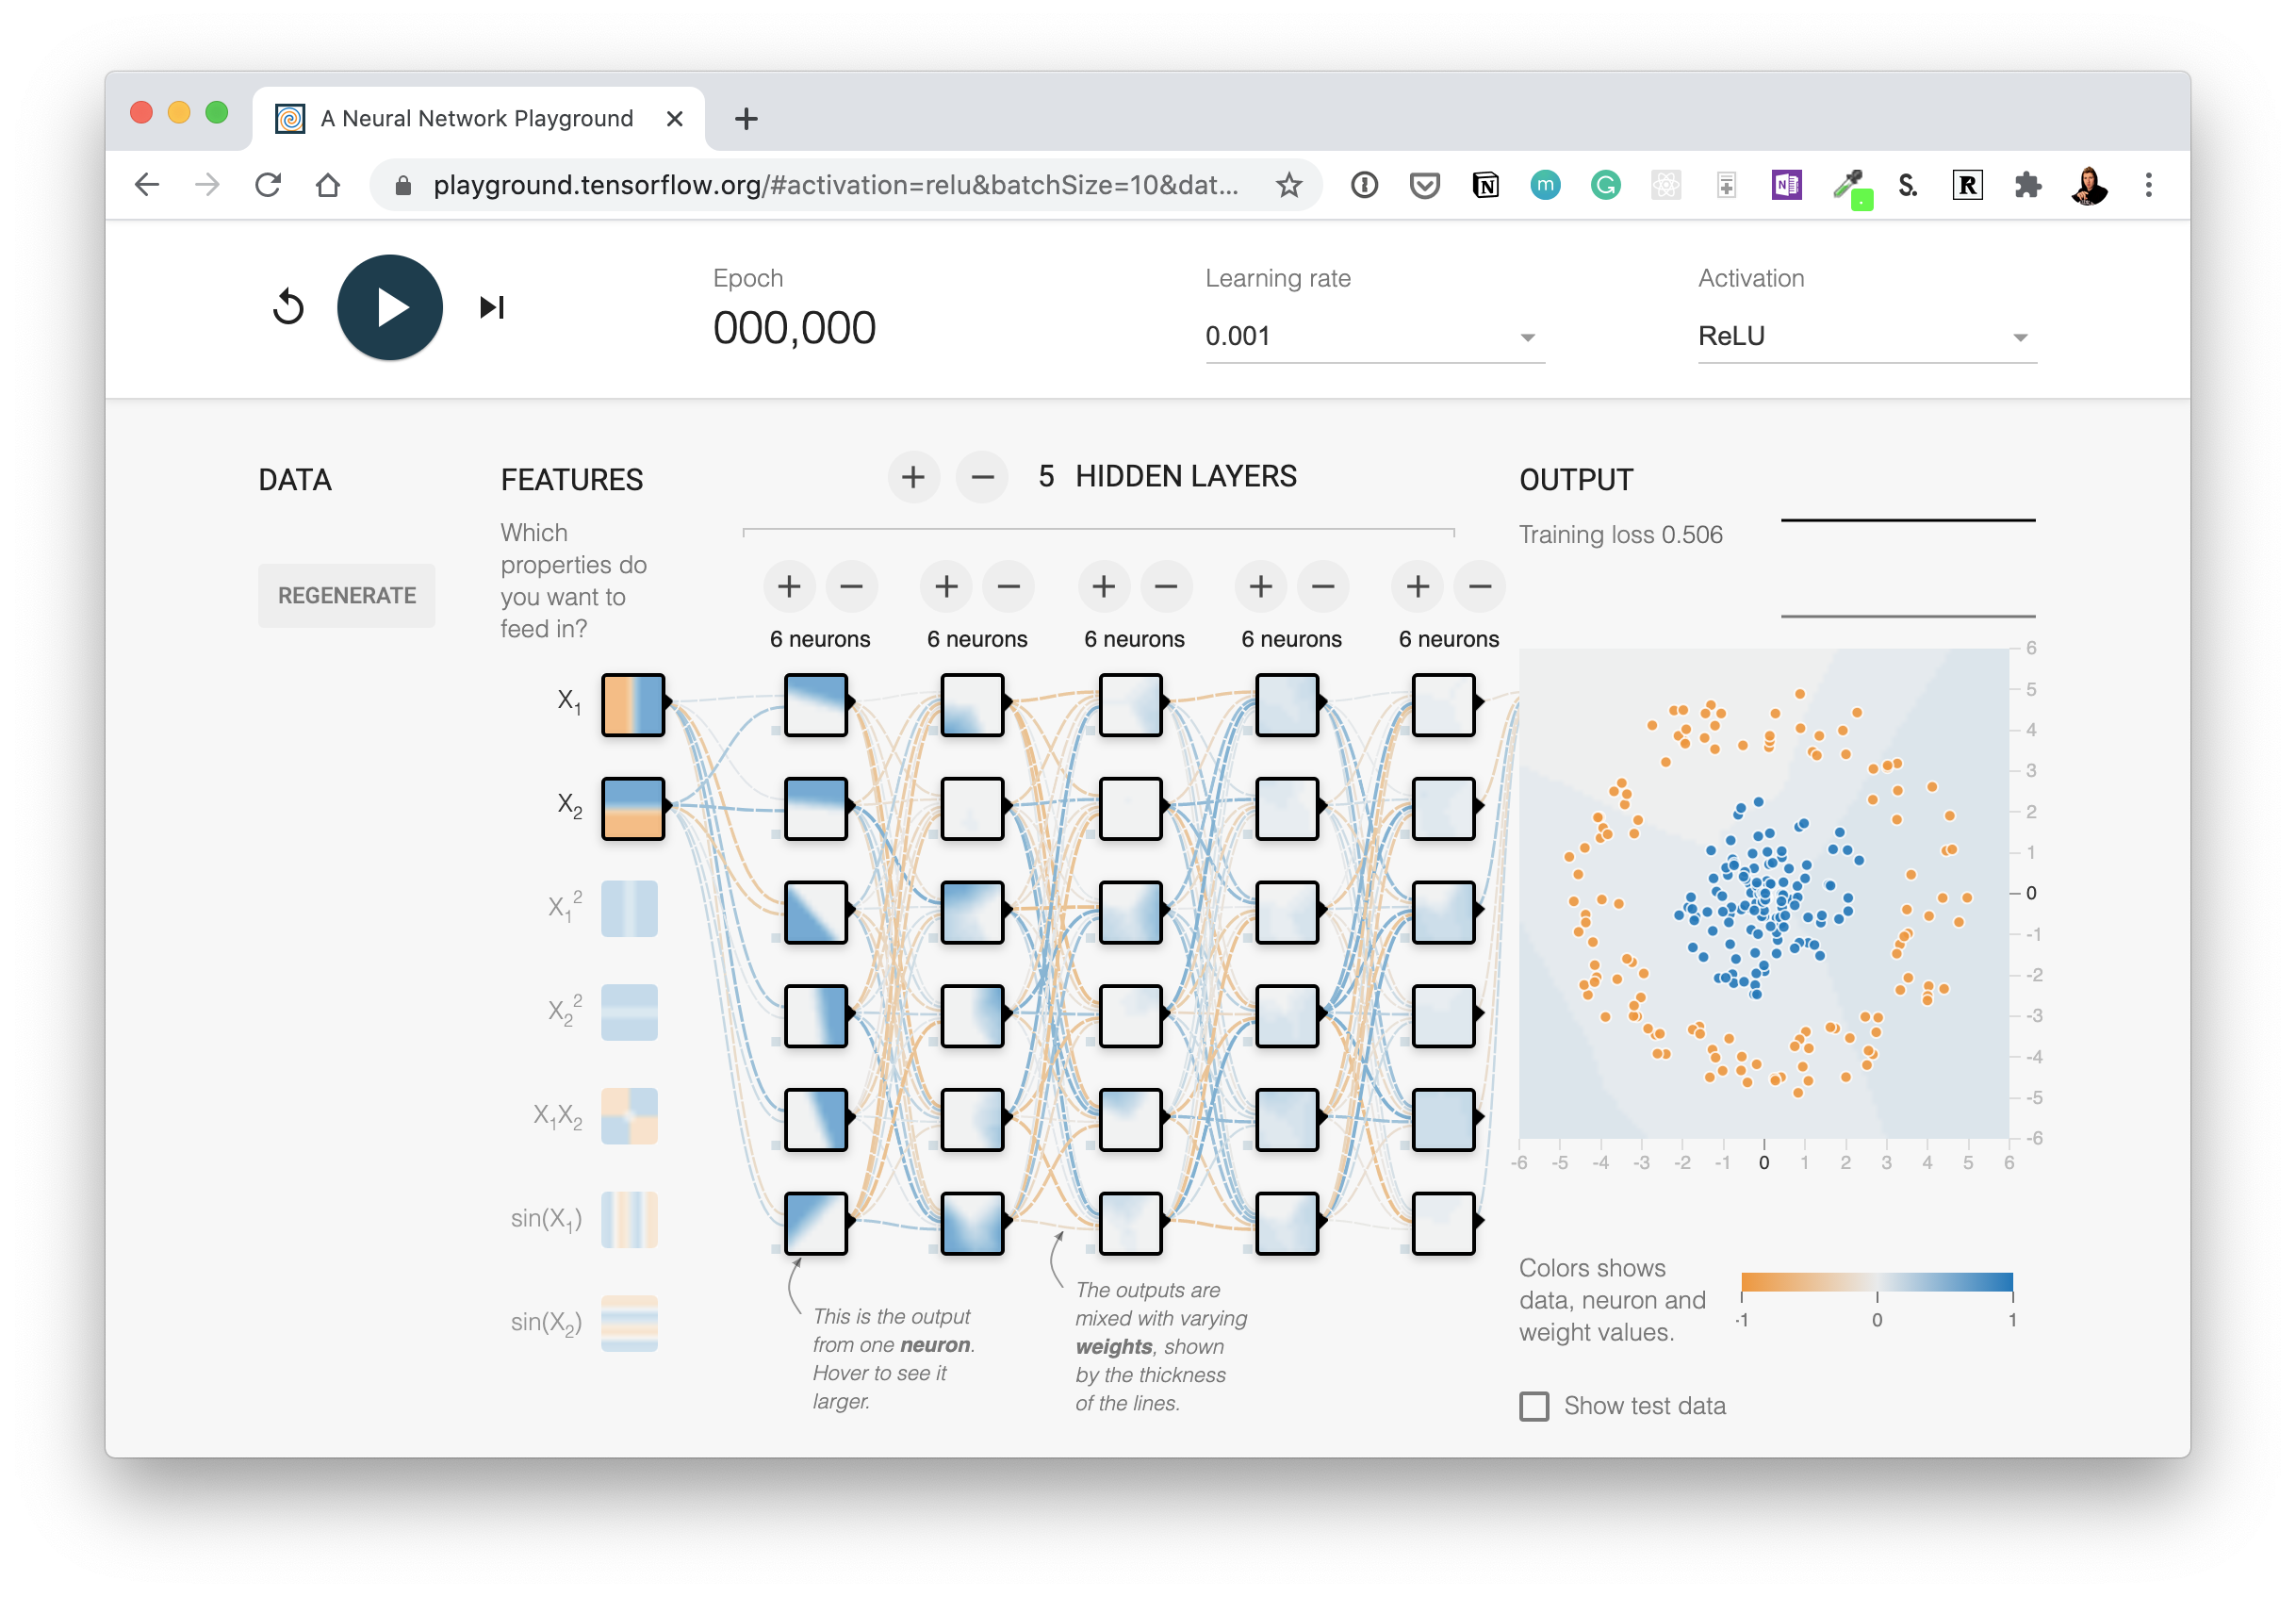

Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.


In [1]:
from sklearn.datasets import make_circles

n_samples = 3000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [2]:
X

array([[ 0.20461446,  0.7444964 ],
       [ 0.24036431, -0.97227107],
       [ 0.23168086,  0.76518771],
       ...,
       [-0.00457306, -1.00924014],
       [ 0.6866531 , -0.77000126],
       [-0.86427892, -0.42505799]])

In [3]:
y[:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [4]:
# Making the data more redable
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.204614,0.744496,1
1,0.240364,-0.972271,0
2,0.231681,0.765188,1
3,0.485038,0.867620,0
4,-0.397572,-0.703067,1
...,...,...,...
2995,0.691894,0.483294,1
2996,-0.112814,-1.007035,0
2997,-0.004573,-1.009240,0
2998,0.686653,-0.770001,0


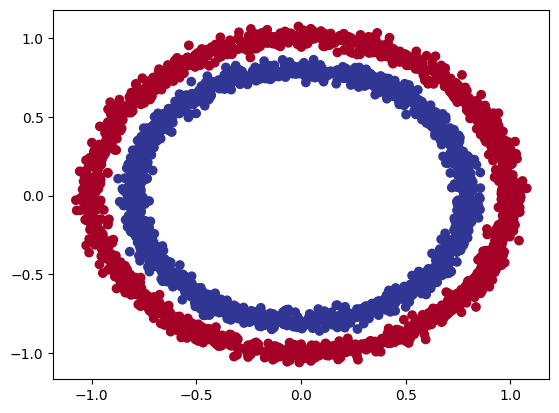

In [5]:
# Visualize the plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [6]:
X.shape, y.shape

((3000, 2), (3000,))

In [7]:
len(X), len(y)

(3000, 3000)

Steps in modeling
* Create or import the model
* Compile the model
* Fit the model
* Evaluate the model
* Keep optimizing

In [8]:
import tensorflow as tf

In [9]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(X, y, epochs=170)


Epoch 1/170
94/94 [==============================] - 3s 7ms/step - loss: 0.6840 - accuracy: 0.5263
Epoch 2/170
94/94 [==============================] - 1s 8ms/step - loss: 0.6741 - accuracy: 0.5557
Epoch 3/170
94/94 [==============================] - 1s 7ms/step - loss: 0.6508 - accuracy: 0.6350
Epoch 4/170
94/94 [==============================] - 1s 7ms/step - loss: 0.5965 - accuracy: 0.7403
Epoch 5/170
94/94 [==============================] - 1s 7ms/step - loss: 0.5004 - accuracy: 0.8190
Epoch 6/170
94/94 [==============================] - 1s 7ms/step - loss: 0.4048 - accuracy: 0.8580
Epoch 7/170
94/94 [==============================] - 1s 6ms/step - loss: 0.3437 - accuracy: 0.8757
Epoch 8/170
94/94 [==============================] - 1s 6ms/step - loss: 0.2972 - accuracy: 0.8947
Epoch 9/170
94/94 [==============================] - 1s 6ms/step - loss: 0.2655 - accuracy: 0.9080
Epoch 10/170
94/94 [==============================] - 1s 7ms/step - loss: 0.2375 - accuracy: 0.9227
Epoch 11/

In [10]:
model_1.evaluate(X, y)

94/94 [==============================] - 1s 4ms/step - loss: 0.0048 - accuracy: 0.9987


[0.00475403293967247, 0.9986666440963745]

In [11]:
import numpy as np

def plot_decision_boundary(model, X, y):
    # Define the acis boundaries of the plat and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 0].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X values (we will make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D array together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print('doing multiclass classification')
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 3ms/step
doing binary classification


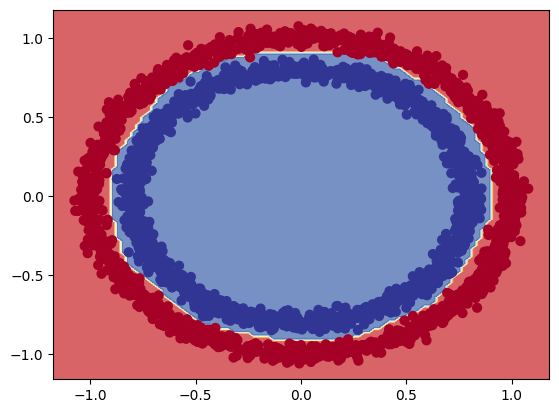

In [12]:
plot_decision_boundary(model_1, X, y)

In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable pa

Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [14]:
from sklearn.datasets import make_moons

In [15]:
X, y = make_moons(n_samples=1000, noise=0.02, random_state=42)

In [16]:
X, y[:10]

(array([[-0.00331218,  0.38337854],
        [ 0.94351058, -0.48147221],
        [ 0.92575899, -0.44953496],
        ...,
        [ 1.64957993, -0.28373727],
        [-0.92937318,  0.36642651],
        [ 0.79815667,  0.60246907]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64))

In [17]:
X.shape, y.shape

((1000, 2), (1000,))

In [18]:
import pandas as pd
moons = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
moons

,X0,X1,label
0,-0.003312,0.383379,1
1,0.943511,-0.481472,1
2,0.925759,-0.449535,1
3,0.430470,-0.366058,1
4,-0.847017,0.527905,0
...,...,...,...
995,0.790500,0.600571,0
996,-0.135420,0.975894,0
997,1.649580,-0.283737,1
998,-0.929373,0.366427,0


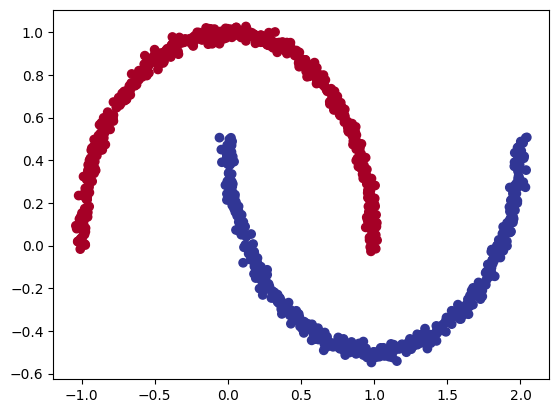

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

Now lets make a model to get over 85% accuracy

In [20]:
# Select random seed
tf.random.set_seed(42)

# Creating the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.6933 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6923 - accuracy: 0.7110
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6864 - accuracy: 0.5540
Epoch 4/100
32/32 [==============================] - 0s 9ms/step - loss: 0.6601 - accuracy: 0.6440
Epoch 5/100
32/32 [==============================] - 0s 10ms/step - loss: 0.5951 - accuracy: 0.8000
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5293 - accuracy: 0.8060
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 0.4888 - accuracy: 0.8120
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 0.4578 - accuracy: 0.8180
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.4265 - accuracy: 0.8260
Epoch 10/100
32/32 [==============================] - 0s 9ms/step - loss: 0.3918 - accuracy: 0.8480
Epoch 11

In [21]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 2.0401e-04 - accuracy: 1.0000


[0.00020400519133545458, 1.0]

In [22]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 18        
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
 dense_8 (Dense)             (None, 6)                 42        
                                                                 
 dense_9 (Dense)             (None, 6)                 42        
                                                                 
 dense_10 (Dense)            (None, 6)                 42        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable 

313/313 [==============================] - 1s 2ms/step
doing binary classification


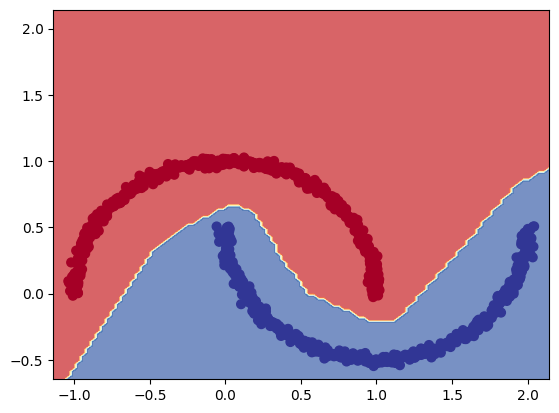

In [23]:
plot_decision_boundary(model_2, X, y)

## Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [24]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [25]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

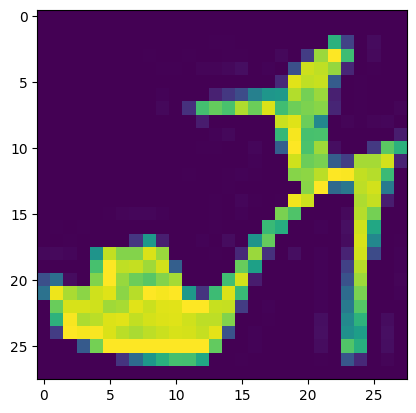

In [26]:
import matplotlib.pyplot as plt
plt.imshow(train_data[9])

In [27]:
train_labels[9]

5

In [28]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
len(class_names)

10

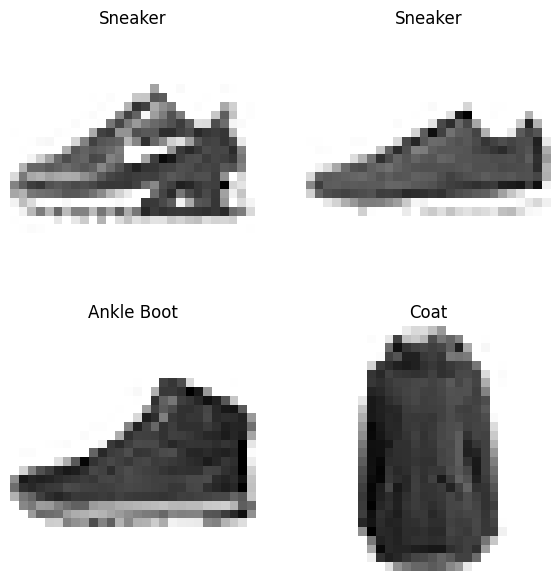

In [29]:
# Plotting random images of MNIST dataset
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

Now we will build our neural network

In [30]:
Flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
Flatten_model.output_shape

(None, 784)

In [31]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [32]:
# Set random seed
tf.random.set_seed(42)

# Building our model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3945 - accuracy: 0.0973 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accura

It has less accuracy so lets scaled it!

In [33]:
# Scaling it by putting all the data between 0 and 1
train_data_norm = train_data / 255
test_data_norm = test_data / 255

# Checking the min and max of scaled training data
train_data_norm.min(), test_data_norm.max()


(0.0, 1.0)

In [34]:
train_data[0].shape

(28, 28)

In [35]:
# # Now building the neural network on the scaled data

# # Setting the random seed
# tf.random.set_seed(42)

# # Building the model
# model_4 = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28,28)),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(8, activation='relu'),
#     tf.keras.layers.Dense(4, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

# # Compile the model
# model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# # Fitting the model
# norm_history = model_4.fit(train_data_norm, train_labels, epochs=25, validation_data=(test_data_norm, test_labels))


In [36]:
# Now building the neural network on the scaled data

# Setting the random seed
tf.random.set_seed(42)

# Building the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# Fitting the model
norm_history_6 = model_6.fit(train_data_norm, train_labels, epochs=25, validation_data=(test_data_norm, test_labels))


Epoch 1/25
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5713 - accuracy: 0.7987 - val_loss: 0.4431 - val_accuracy: 0.8406
Epoch 2/25
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3930 - accuracy: 0.8591 - val_loss: 0.4577 - val_accuracy: 0.8407
Epoch 3/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3571 - accuracy: 0.8704 - val_loss: 0.3816 - val_accuracy: 0.8625
Epoch 4/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3336 - accuracy: 0.8788 - val_loss: 0.3962 - val_accuracy: 0.8550
Epoch 5/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3164 - accuracy: 0.8842 - val_loss: 0.3915 - val_accuracy: 0.8584
Epoch 6/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3031 - accuracy: 0.8893 - val_loss: 0.3986 - val_accuracy: 0.8551
Epoch 7/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2968 - accuracy: 0.8906 - val_loss: 0.3686 - val_ac

In [37]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix
import numpy as np


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    # make it prettier
    fig, ax = plt.subplots(figsize=figsize)

    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    # Set x axis labels to bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label  size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2

    # Plt the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment='center',
                color='white' if cm[i, j] > threshold else 'black',
                size=text_size)

In [38]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [39]:
y_probs = model_6.predict(test_data_norm)       # Prediction probabilities

y_probs[:4]

313/313 [==============================] - 1s 2ms/step


array([[2.4106481e-07, 7.9033067e-05, 8.2748047e-10, 9.6278711e-07,
        3.0990979e-08, 1.0434027e-04, 1.4157838e-07, 6.8225861e-03,
        2.8639717e-05, 9.9296403e-01],
       [1.9040681e-05, 1.8492673e-12, 9.9919349e-01, 1.4660195e-08,
        3.8767661e-04, 1.4316674e-21, 3.9977036e-04, 9.4373772e-27,
        7.2377865e-10, 1.6299041e-27],
       [4.2581589e-12, 1.0000000e+00, 3.0408276e-14, 1.6623800e-13,
        3.6536819e-13, 2.6069254e-23, 3.1349239e-11, 1.7492468e-22,
        3.1379113e-17, 3.5914284e-21],
       [1.6994831e-09, 1.0000000e+00, 1.7787835e-11, 6.4464767e-10,
        1.0963295e-09, 5.6817451e-16, 1.0861232e-08, 2.5340155e-16,
        4.4516710e-13, 4.2312212e-13]], dtype=float32)

In [40]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.4106481e-07, 7.9033067e-05, 8.2748047e-10, 9.6278711e-07,
        3.0990979e-08, 1.0434027e-04, 1.4157838e-07, 6.8225861e-03,
        2.8639717e-05, 9.9296403e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle Boot')

In [41]:
# Converting all predictions probabilities into integers
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 0, 1, 4, 6, 5, 7], dtype=int64)

In [42]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

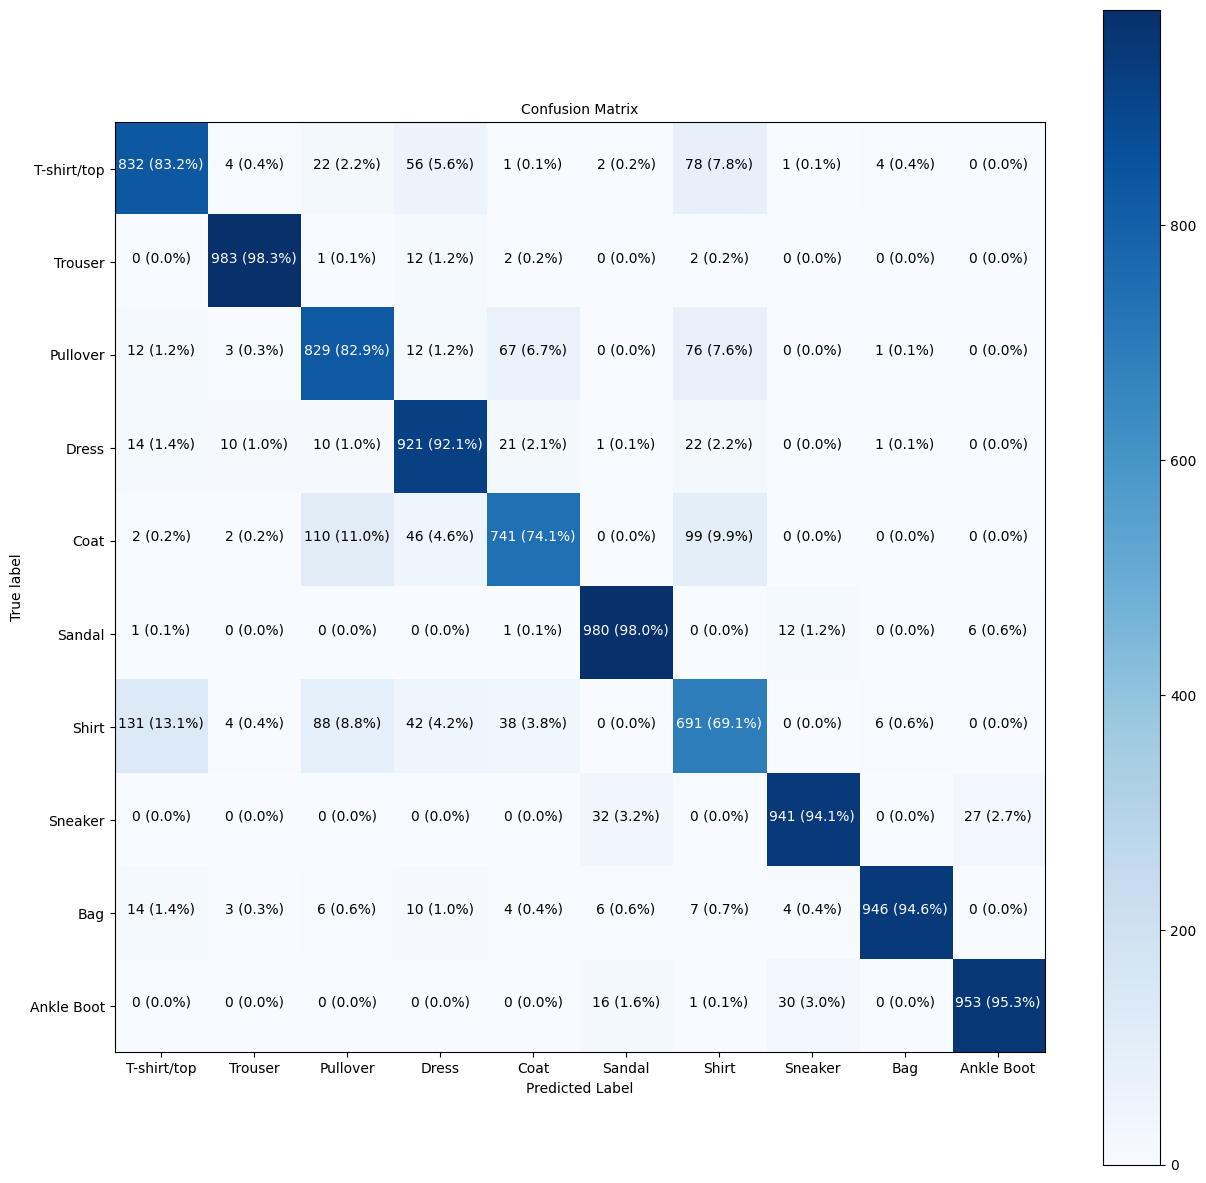

In [43]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time.

In [44]:
import random
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_random_images(model, images, true_labels, classes, num_images=6):
    """
    Picks random images, plots them and labels them with predictions and truth labels.
    """
    plt.figure(figsize=(15, 6))  # Adjust the figure size to accommodate 10 images

    for i in range(num_images):
        random_index = random.randint(0, len(images) - 1)

        # Create predictions and targets
        target_image = images[random_index]
        pred_probs = model.predict(target_image.reshape(1, 28, 28))
        pred_label = classes[pred_probs.argmax()]
        true_label = classes[true_labels[random_index]]

        # Subplot indexing starts at 1
        ax = plt.subplot(2, 3, i + 1)  # 2 rows, 5 columns
        plt.imshow(target_image, cmap=plt.cm.binary)

        # Change the color of the titles depending on if the prediction is right or wrong
        if pred_label == true_label:
            color = 'green'
        else:
            color = 'red'

        # Add xlabel information (prediction/true label)
        plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                         100 * tf.reduce_max(pred_probs),
                                                         true_label),
                                                         color=color)
        plt.xticks([])
        plt.yticks([])

    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 27ms/step


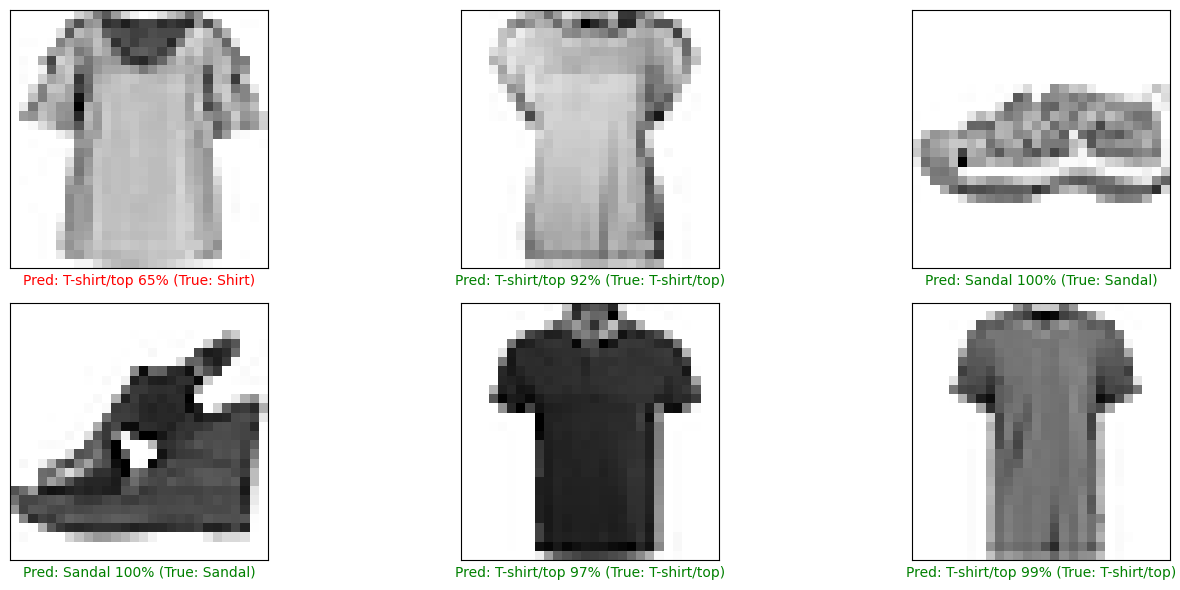

In [45]:
plot_random_images(model=model_6, images=test_data_norm,
                   true_labels=test_labels, classes=class_names)

Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [47]:
def plot_class_predictions(model, images, labels, classes, class_name, num_images=3):
    class_index = classes.index(class_name) # Find index of the desired class

    # Filter images and labels for the chosen class
    class_images = images[labels == class_index]
    class_labels = labels[labels == class_index]

    # Ensure enough images are available
    if len(class_images) < num_images:
        num_images = len(class_images)
        print(f"Warning: Only {num_images} images found for class {class_name}")
    plt.figure(figsize=(10, 4))

    for i in range(num_images):
        # Get random image and label from the filtered class data
        random_index = random.randint(0, len(class_images) -1 )
        image = class_images[random_index]
        true_label = classes[class_labels[random_index]]

        # Predict and get the most likely class
        pred_probs = model.predict(image.reshape(1,28,28))
        pred_label = classes[pred_probs.argmax()]

        # Plot the image and prediction
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(image, cmap=plt.cm.binary)
        plt.xlabel(f"Pred: {pred_label} (True: {true_label})")
        plt.xticks([])
        plt.yticks([])
    plt.suptitle(f"Predicted labels for {class_name} class")
    plt.tight_layout()
    plt.show()



In [50]:
test_labels[0]

9

1/1 [==============================] - 0s 42ms/step


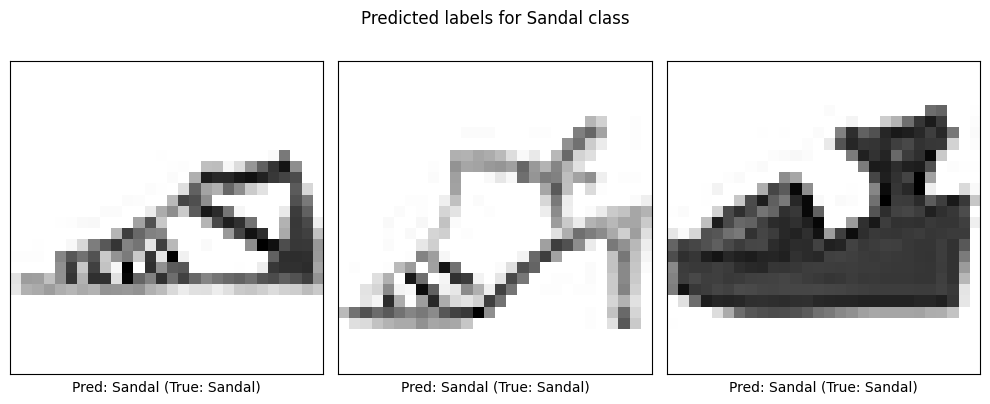

In [52]:
plot_class_predictions(model_6, images=test_data_norm, labels=test_labels,
                       classes=class_names, class_name='Sandal')

Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [56]:
# Recreating the softmax function
def custom_softmax(x):
    # Calculate the exponential of each element in the input tensor
    exp_x = tf.exp(x)

    # Calculate the sum of exponentials across the specified axis
    sum_exp_x = tf.reduce_sum(exp_x)

    # Devide each element by the sum to get the softmax values
    return exp_x / sum_exp_x


In [57]:
x = tf.constant([1.0, 2.0, 3.0])

softmax_output = custom_softmax(x)

print('Origical tensor:', x.numpy())
print('Softmax output:', softmax_output.numpy())

Origical tensor: [1. 2. 3.]
Softmax output: [0.09003057 0.24472848 0.66524094]
